## Notebook Integration with GCP Services

### Import libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
sb.set()

### Integration with Google Cloud Storage

In [3]:
df = pd.read_csv('gs://crazy-hippo-01/dataset/census_train.csv')

In [4]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


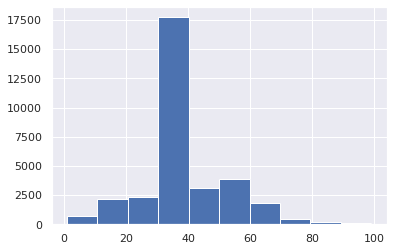

In [8]:
df['hours_per_week'].hist();

### Integration with BigQuery

In [9]:
%%bigquery df_from_bq
SELECT *
FROM `crazy-hippo-01.census_data_us.census_data_us`

In [10]:
df_from_bq.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,Private,297847,9th,5,Married-civ-spouse,Other-service,Wife,Black,Female,3411,0,34,United-States,<=50K
1,72,Private,74141,9th,5,Married-civ-spouse,Exec-managerial,Wife,Asian-Pac-Islander,Female,0,0,48,United-States,>50K
2,45,Private,178215,9th,5,Married-civ-spouse,Machine-op-inspct,Wife,White,Female,0,0,40,United-States,>50K
3,31,Private,86958,9th,5,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
4,55,Private,176012,9th,5,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,23,United-States,<=50K


In [11]:
df_from_bq.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32461.000000,3.246100e+04,32461.000000,32461.000000,32461.000000,32461.000000
mean,38.574628,1.897527e+05,10.080343,1076.088106,87.545670,40.432920
std,13.638083,1.055566e+05,2.572189,7374.718111,403.527585,12.337919
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.177980e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783440e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369900e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [12]:
df_from_bq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32461 entries, 0 to 32460
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32461 non-null  int64 
 1   workclass       32461 non-null  object
 2   fnlwgt          32461 non-null  int64 
 3   education       32461 non-null  object
 4   education_num   32461 non-null  int64 
 5   marital_status  32461 non-null  object
 6   occupation      32461 non-null  object
 7   relationship    32461 non-null  object
 8   race            32461 non-null  object
 9   sex             32461 non-null  object
 10  capital_gain    32461 non-null  int64 
 11  capital_loss    32461 non-null  int64 
 12  hours_per_week  32461 non-null  int64 
 13  native_country  32461 non-null  object
 14  income          32461 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### Running Queries on BigQuery Data

In [13]:
%%bigquery group_by_age
SELECT age, sex, income 
FROM `crazy-hippo-01.census_data_us.census_data_us` 
WHERE age >=30 AND age <= 50

In [14]:
group_by_age.head()

,age,sex,income
0,39,Female,<=50K
1,45,Female,>50K
2,31,Female,<=50K
3,30,Female,<=50K
4,46,Female,<=50K


In [17]:
group_by_age.groupby('sex').count()

,age,income
sex,,
Female,4870,4870
Male,11464,11464
